# Caso Práctico

El presente ejercicio es similar al caso práctico de repaso de optimización de campañas de marketing online ya realizado y lo que se pretende con este es asentar los conceptos relativos al algoritmo del bandido multibrazo, como son las ratios de explotación y exploración para la optimización de una campaña de marketing online.

Al igual que en el caso práctico de repaso, se tiene que hacer una campaña de marketing online para promocionar un determinado producto con la que se mostrará en una página web un banner con una imagen del producto que promocionar. Se han realizado cinco imágenes distintas del producto para poner en el banner con el objetivo de captar la atención del usuario para que pulse en el banner y acceda a la web con los detalles del producto que promocionar, pero, a diferencia del caso práctico de repaso, los resultados obtenidos serán diferentes, siendo otra imagen la que mayor valor de Q tenga calculado a partir de la siguiente fórmula:

<img src="formula.png" style="width: 400px;"/>

Sin saber a priori cuál es la imagen que captará mayor atención, se debe aprender con base en los clics que se realizan sobre el banner qué imagen será las más llamativa y conseguirá más visitas aplicando el método del bandido multibrazo.

El objetivo es encontrar la imagen que capte mayor atención de los usuarios, es decir que mayor número de clics obtenga:
Dado el método ya implementado en el notebook “multi_armed_bandit(num_games=1000, epsilon=0.1, verbose=False)”, se pide, modificando el valor de épsilon, responder a la siguientes preguntas para asentar los conceptos relativos al aprendizaje por refuerzo y, en particular, al algoritmo del bandido multibrazo:

1. ¿Cuál es el valor de épsilon que maximiza la imagen con mayor número de clics?
2. ¿Cuál es la imagen que más clics obtiene y cuántos?
3. Poniendo un ratio de explotación del 100%, ¿Qué resultado se obtiene?

In [6]:
import random
import numpy as np

   
    
def multi_armed_bandit(num_games=1000, epsilon=0.1, verbose=False):
    
    bandits = [0.1, 0.05, 0.03, 0.7, 0.02]
    total_reward = 0
    acum_reward_bandit = np.zeros(len(bandits))  # numerador
    num_selected_bandit = np.zeros(len(bandits)) # denominador
    q_bandits = np.zeros(len(bandits))            # Q(a)
    
    if verbose:
        print("Initial Bandits Distribution\n  {}".format(bandits))
    
    for game in range(0,num_games):
        
        old_q_bandits = q_bandits.copy()
        
        if np.random.random() < epsilon:
            bandit = np.random.randint(len(bandits)) # Exploro
        else:
            bandit = np.random.choice(np.flatnonzero(q_bandits == q_bandits.max())) # Exploto 
            
        # Obtengo el reward
        reward = 1 if (np.random.random() < bandits[bandit]) else 0
        
        # Actualizo reward total
        total_reward += reward
        
        # Actualizo valor (Q) de la imagen
        acum_reward_bandit[bandit] += reward
        num_selected_bandit[bandit] += 1
        q_bandits[bandit] = acum_reward_bandit[bandit] / num_selected_bandit[bandit]
        
        if verbose:
            print("\nGAME {game}\n  Old Q_Bandits = {old_q_bandits}\n  Selected Bandit = {bandit} \
                  \n  Reward = {reward}\n  Q_Bandits = {q_bandits}"
                  .format(game=game+1, old_q_bandits=old_q_bandits, bandit=bandit, 
                          reward=reward, q_bandits=q_bandits))
    
    return bandits, total_reward, q_bandits, num_selected_bandit


1. ¿Cuál es el valor de épsilon que maximiza la imagen con mayor número de clics?

El valor ideal de épsilon es de 0.1, ya que explota la imagen con mayor número de clics (cada 100 impresiones, en 90 la muestra. Las 10 restantes son una imagen al azar) pero explorando cada cierto tiempo, por si hay una solución más óptima.

Para demostrarlo, a continuación se realizará una ejecución con un ratio de exploración de un 10%:

Initial Bandits Distribution
  [0.1, 0.05, 0.03, 0.7, 0.02]
Bandits Distribution games
  [ 19.  22.  16. 909.  34.]
Q(a) Bandits
  [0.     0.1818 0.0625 0.7338 0.    ]
Reward: 672


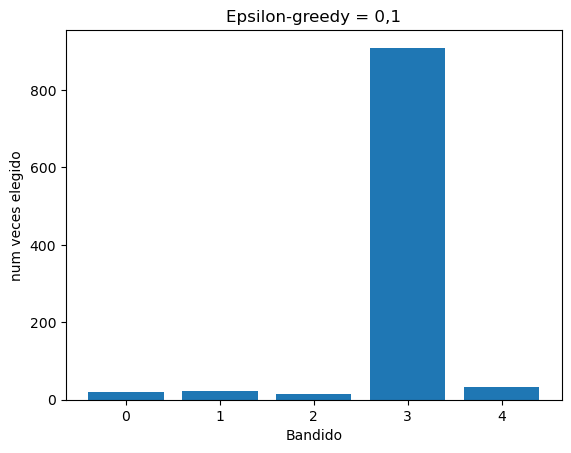

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=4)

bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000, 
                                                                           epsilon=0.1, 
                                                                           verbose=False)

print("Initial Bandits Distribution\n  {}".format(bandits))
print("Bandits Distribution games\n  {}".format(num_selected_bandit))
print("Q(a) Bandits\n  {}".format(q_bandits))
print("Reward: {}".format(total_reward))

# Mostramos en una gráfica de barras el número de veces que elegimos cada "tragaperras"
plt.title('Epsilon-greedy = 0,1')
plt.bar(range(0,len(bandits)), num_selected_bandit)
plt.xlabel('Bandido')
plt.ylabel('num veces elegido')
plt.show()

Ratio de exploración del 15%: 

Initial Bandits Distribution
  [0.1, 0.05, 0.03, 0.7, 0.02]
Bandits Distribution games
  [ 30.  24.  23. 890.  33.]
Q(a) Bandits
  [0.0667 0.0417 0.087  0.6629 0.0606]
Reward: 597


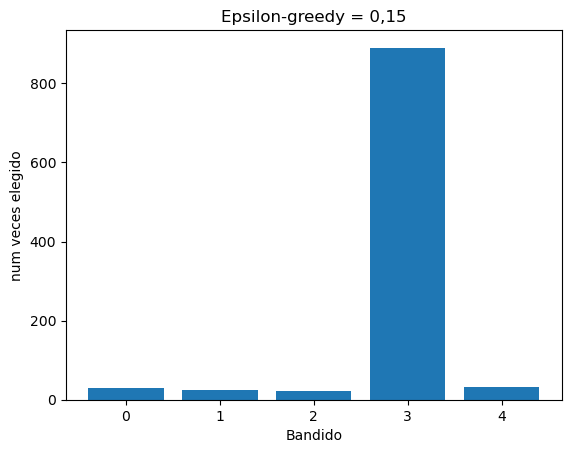

In [8]:
%matplotlib inline
np.set_printoptions(precision=4)

bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000, 
                                                                           epsilon=0.15, 
                                                                           verbose=False)

print("Initial Bandits Distribution\n  {}".format(bandits))
print("Bandits Distribution games\n  {}".format(num_selected_bandit))
print("Q(a) Bandits\n  {}".format(q_bandits))
print("Reward: {}".format(total_reward))

# Mostramos en una gráfica de barras el número de veces que elegimos cada "tragaperras"
plt.title('Epsilon-greedy = 0,15')
plt.bar(range(0,len(bandits)), num_selected_bandit)
plt.xlabel('Bandido')
plt.ylabel('num veces elegido')
plt.show()

Ratio de exploración del 5%:

Initial Bandits Distribution
  [0.1, 0.05, 0.03, 0.7, 0.02]
Bandits Distribution games
  [  5.  10.   9. 970.   6.]
Q(a) Bandits
  [0.     0.     0.     0.7082 0.    ]
Reward: 687


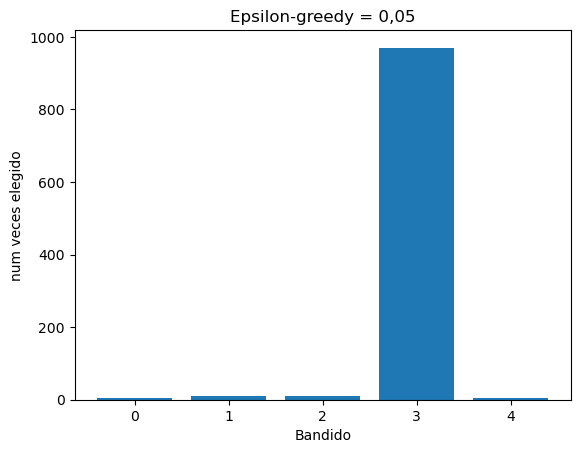

In [10]:
%matplotlib inline
np.set_printoptions(precision=4)

bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000, 
                                                                           epsilon=0.05, 
                                                                           verbose=False)

print("Initial Bandits Distribution\n  {}".format(bandits))
print("Bandits Distribution games\n  {}".format(num_selected_bandit))
print("Q(a) Bandits\n  {}".format(q_bandits))
print("Reward: {}".format(total_reward))

# Mostramos en una gráfica de barras el número de veces que elegimos cada "tragaperras"
plt.title('Epsilon-greedy = 0,05')
plt.bar(range(0,len(bandits)), num_selected_bandit)
plt.xlabel('Bandido')
plt.ylabel('num veces elegido')
plt.show()

Ratio de exploración del 0%:

Initial Bandits Distribution
  [0.1, 0.05, 0.03, 0.7, 0.02]
Bandits Distribution games
  [997.   1.   1.   0.   1.]
Q(a) Bandits
  [0.0983 0.     0.     0.     0.    ]
Reward: 98


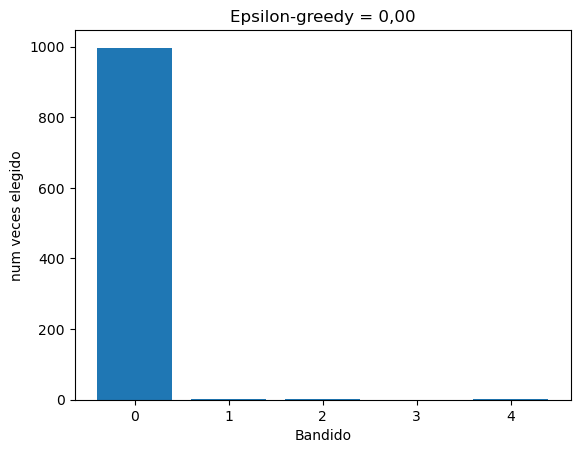

In [11]:
%matplotlib inline
np.set_printoptions(precision=4)

bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000, 
                                                                           epsilon=0.00, 
                                                                           verbose=False)

print("Initial Bandits Distribution\n  {}".format(bandits))
print("Bandits Distribution games\n  {}".format(num_selected_bandit))
print("Q(a) Bandits\n  {}".format(q_bandits))
print("Reward: {}".format(total_reward))

# Mostramos en una gráfica de barras el número de veces que elegimos cada "tragaperras"
plt.title('Epsilon-greedy = 0,00')
plt.bar(range(0,len(bandits)), num_selected_bandit)
plt.xlabel('Bandido')
plt.ylabel('num veces elegido')
plt.show()

Es decir, epsilon debe estar dentro del rango 0.05-0.1. Reducir el valor de épsilon por debajo de 0.05 no solo hará que se reduzca la recompensa, sino que, como vemos en el caso del ratio de exploración de 0%, se limitará a escoger una imagen al azar en vez de explotar la imagen con más clics.

2. ¿Cuál es la imagen que más clics obtiene y cuántos?

Es la imagen 3, con aproximadamente 900 clics.

3. Poniendo un ratio de explotación del 100%, ¿Qué resultado se obtiene?

Initial Bandits Distribution
  [0.1, 0.05, 0.03, 0.7, 0.02]
Bandits Distribution games
  [201. 222. 180. 195. 202.]
Q(a) Bandits
  [0.0746 0.0541 0.0111 0.7179 0.0149]
Reward: 172


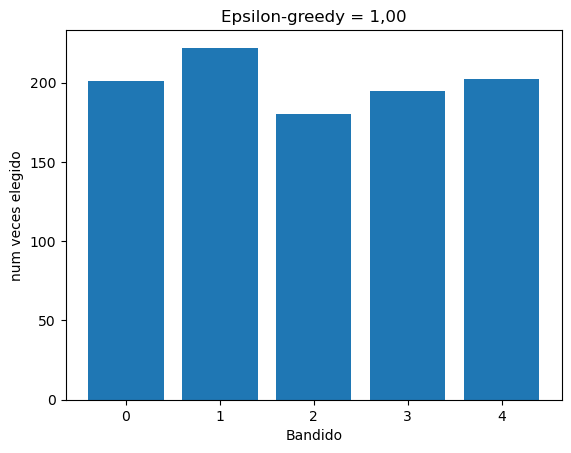

In [12]:
%matplotlib inline
np.set_printoptions(precision=4)

bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000, 
                                                                           epsilon=1.00, 
                                                                           verbose=False)

print("Initial Bandits Distribution\n  {}".format(bandits))
print("Bandits Distribution games\n  {}".format(num_selected_bandit))
print("Q(a) Bandits\n  {}".format(q_bandits))
print("Reward: {}".format(total_reward))

# Mostramos en una gráfica de barras el número de veces que elegimos cada "tragaperras"
plt.title('Epsilon-greedy = 1,00')
plt.bar(range(0,len(bandits)), num_selected_bandit)
plt.xlabel('Bandido')
plt.ylabel('num veces elegido')
plt.show()

El ratio de exploración del 100% garantiza que se esté siempre explorando, sin explotar ninguna de las imágenes en concreto.
Es decir, no se detecta la imagen con mayor beneficio y por lo tanto no se obtienen resultados óptimos.

En cambio, un ratio de explotación del 100% (equivalente al ratio de exploración del 0%) explota una imagen al azar. Lo normal es que la imagen seleccionada no sea la de mayor beneficio, por lo que no es la solución óptima.

En conclusión, para obtener buenos resultados es necesario explotar la imagen de mayor beneficio, sin olvidarnos de explorar cada cierto tiempo por si hay otras soluciones mejores.